In [1]:
#Prediciones basdo en regresion Lineal
import pandas as pd

data = pd.read_csv('housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data_na = data.dropna()

In [7]:
data_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [19]:
dummies = pd.get_dummies(data_na['ocean_proximity'], dtype=int)

In [21]:
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [23]:
data_na = data_na.join(dummies)

In [25]:
data_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
 10  <1H OCEAN           20433 non-null  int64  
 11  INLAND              20433 non-null  int64  
 12  ISLAND              20433 non-null  int64  
 13  NEAR BAY            20433 non-null  int64  
 14  NEAR OCEAN          20433 non-null  int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 2.5+ MB


In [31]:
data_na = data_na.drop('ocean_proximity', axis=1)

In [35]:
data_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   <1H OCEAN           20433 non-null  int64  
 10  INLAND              20433 non-null  int64  
 11  ISLAND              20433 non-null  int64  
 12  NEAR BAY            20433 non-null  int64  
 13  NEAR OCEAN          20433 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 2.3 MB


In [37]:
import seaborn as sb

<Axes: xlabel='median_house_value', ylabel='median_income'>

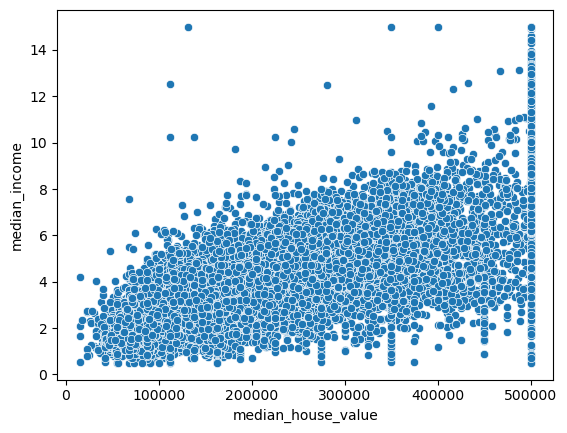

In [41]:
sb.scatterplot(x=data_na['median_house_value'], y=data_na['median_income'])

In [43]:
# A veces se hace ncesario agregar nuevas ccaracteristicas cuando dos o mas variables podrian tener alguna relación
# Por ejemplo habitaciónes y habitaciones para dormir ...

data_na["bedroom_ratio"] = data_na['total_bedrooms'] / data_na['total_rooms']



<Axes: >

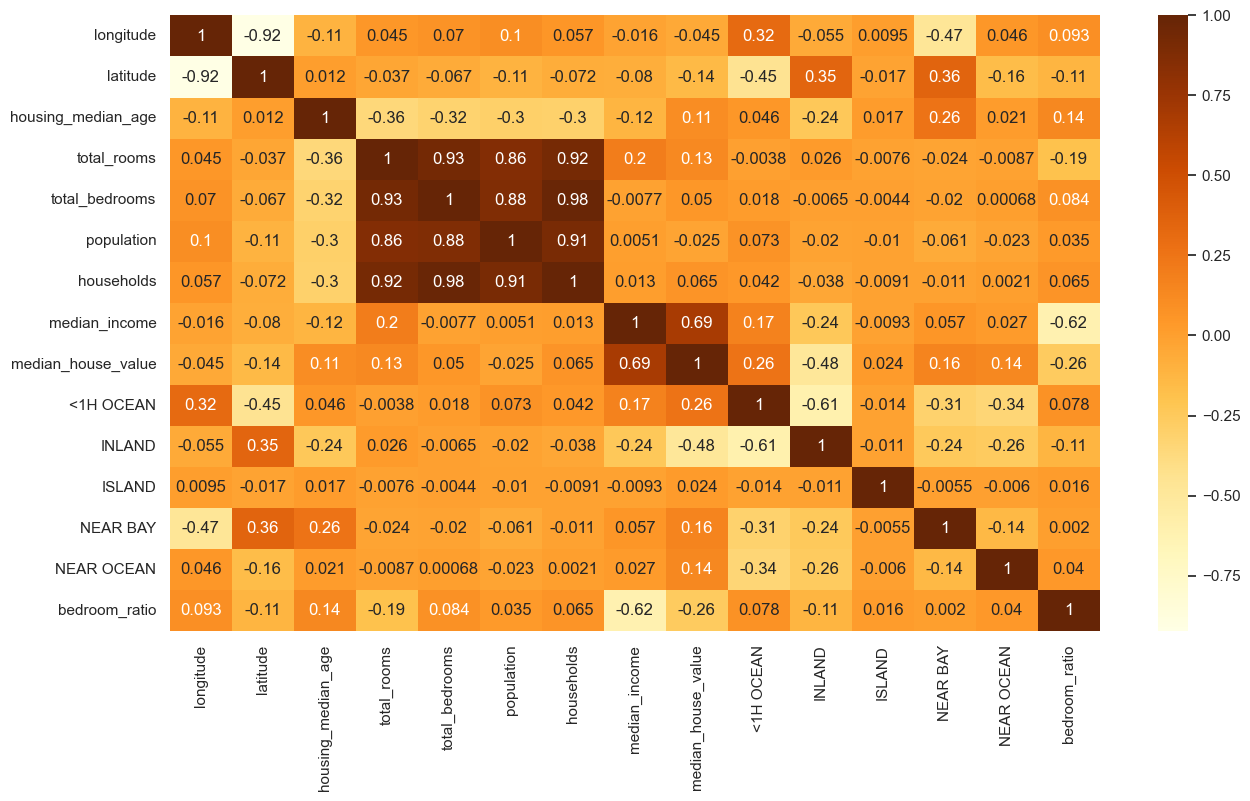

In [51]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data_na.corr(), annot= True, cmap = 'YlOrBr')

In [53]:
# entre mas habitaciónes no especificas mayor es el precio, podrian usarse para otras cosas

In [55]:
# Separar las características de la etiqueta
x = data_na.drop(['median_house_value'], axis =1)
y = data_na['median_house_value']

In [57]:
# Separar la data en dos partes: 1 de entrenamiento y un ode prueba 
from sklearn.model_selection import train_test_split


In [59]:
x_ent, x_test, y_ent, y_test = train_test_split(x,y,test_size=.2)

In [63]:
x_test.shape

(4087, 14)

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [69]:
# Entrenamos el modelo
model.fit(x_ent, y_ent)

LinearRegression()

In [77]:
predictions = model.predict(x_test)
compare = {'predictions' : predictions, 'real value':y_test}
pd.DataFrame(compare)

,predictions,real value
15692,431535.632083,500001.0
19655,92020.111830,89400.0
15518,182895.740840,156800.0
10434,234889.578662,370800.0
8941,255007.680872,500001.0
...,...,...
20015,92724.278383,103400.0
16041,201798.960813,239300.0
18595,269286.503297,239600.0
1197,102308.870022,73500.0


In [83]:
# 500001 Este es un ejemplo el por que a veces se deben pre-procesar mas los datos, 
# cuando se tiene limite como maximo 50000 la linea batalla para adaptarse por que tiene muchso datos y muchos quedan en 5000 cuando realmente valen mas
# 
# A veces el modelo funciona muy bien con los datos de entrenamiento pero muy mal con los datos de prueba
# Esto se concoe como Overfitting o sobreajuste, aprende los datos de prueba pero luego no puede generalizar
print(model.score(x_ent, y_ent))

0.6498207112978661


In [81]:
print(model.score(x_test, y_test))

0.6599766168638517


In [93]:
# También se puede calcular el error, el valor agrupado entre valores reales y predicciones

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)

In [95]:
mse

4731838478.234367

In [97]:
# EL Error es bastante grande, es muy comun en machin learning 
# Cuando queremos calcular el error no solos calculamos error y residuales
# Sino que se elevan al cadrado:
# Para que los negativos se hagan positivos 
# para que las diferencias se hagan mas notorias, si algunos datos tienen poco error los numeros se mantienen pequenios 
# Pero sino aumentan considerablemente

# Revisemos la raiz cuadrada
rmse = np.sqrt(mse)


In [99]:
rmse

68788.3600490255

In [101]:
# Y este dato en promedio cuanto estamos fallandoos al calcular el precio de todas las casa


In [105]:
# Scalr o escalamiento 
# El problema es que cuando estamos entrenando los datos numericos, es posible que hayan numeros muy grandes y muy pequenios
# y el componente de  mayor peso a los numeros mas grandes... entonces usar scaler para igualar los datos y los rangos 
# Y asi el modelo no le dara mayor importancia alos numeros grandes
# Generalmente se escalan las características y no las etiquetas 

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_ent_esc = scaler.fit_transform(x_ent)
x_test_esc = scaler.fit_transform(x_test)

In [109]:
pd.DataFrame(x_ent_esc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.256261,-1.411742,-0.210710,-0.488873,-0.597441,-0.249212,-0.488412,0.001580,-0.893111,-0.683323,-0.015645,-0.351665,2.613866,-0.520459
1,0.767818,-0.870457,-0.370004,0.538235,0.097887,0.349157,0.236930,1.032041,1.119682,-0.683323,-0.015645,-0.351665,-0.382575,-1.051198
2,-1.320526,1.000711,1.222938,0.153355,0.408767,0.750143,0.289301,-0.778184,-0.893111,-0.683323,-0.015645,2.843617,-0.382575,0.441948
3,1.036960,-0.744468,-1.962946,1.554829,1.500408,1.868639,1.567160,0.169100,-0.893111,1.463437,-0.015645,-0.351665,-0.382575,-0.333584
4,-0.847035,1.416007,-1.007180,0.252546,0.826438,0.110876,0.792065,-0.709638,-0.893111,1.463437,-0.015645,-0.351665,-0.382575,1.108700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-1.131129,0.809394,-0.051415,-0.481559,-0.471665,-0.154077,-0.383670,0.160618,1.119682,-0.683323,-0.015645,-0.351665,-0.382575,0.022232
16342,-1.385319,2.288596,-0.927533,-0.161131,-0.201128,-0.399470,-0.171566,-0.608861,-0.893111,1.463437,-0.015645,-0.351665,-0.382575,-0.251731
16343,-1.235796,0.790729,-0.927533,0.476069,0.679304,-0.054497,0.509261,1.301239,1.119682,-0.683323,-0.015645,-0.351665,-0.382575,0.186280
16344,-1.315541,0.851391,1.541526,-0.033142,-0.512008,-0.448371,-0.519835,3.720049,-0.893111,-0.683323,-0.015645,-0.351665,2.613866,-1.499353
